# Linear Regression

Import Libaries

In [1]:
import numpy
import math
import matplotlib.pyplot

In [2]:
scale = 8.0
start = 0.0
end = 50.0
increment = 1
epoch = 20

#Randomly Generate Data
xDataSet = numpy.arange(start, end, increment)
yDataSet = numpy.array([(i+numpy.random.normal(scale=scale)+5) for i in xDataSet])

#Get Averages for Dataset
xAverage = numpy.average(xDataSet)
yAverage = numpy.average(yDataSet)

numerator = 0.0
denominator = 0.0

# Using Batch Gradient Descent

In [4]:
def GradientDescent(aCurrent, bCurrent, xDataSet, yDataSet, learningRate):
    aGradient = 0.0
    bGradient = 0.0
    #N = float(zip(xDataSet))
    for x,y in zip(xDataSet, yDataSet):
        aGradient += -(2/len(xDataSet)) * (y - ((bCurrent*x) + aCurrent))
        bGradient += -(2/len(xDataSet)) * x * (y - ((bCurrent * x) + aCurrent))
    aNew = aCurrent - (learningRate * aGradient)
    bNew = bCurrent - (learningRate * bGradient)
    return [aNew, bNew]

A: -0.3725666939694733
B: -1.7608177612096785


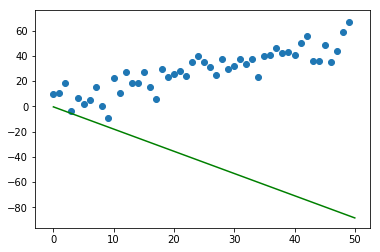

In [5]:
startingA = numpy.random.normal();
startingB = numpy.random.normal();

print("A: " + str(startingA))
print("B: " + str(startingB))

matplotlib.pyplot.clf()
matplotlib.pyplot.plot([start, end],[(startingA + (start * startingB)), (startingA + (end * startingB))], color='g')
matplotlib.pyplot.scatter(xDataSet,yDataSet)
matplotlib.pyplot.show()
#matplotlib.pyplot.savefig("sgd" + str(0) + ".png")

for i in range(epoch):
    startingA, startingB = GradientDescent(startingA, startingB, xDataSet, yDataSet, .0001)
    #print("A:" + str(startingA))
    #print("B:" + str(startingB))
    #matplotlib.pyplot.clf()
    #matplotlib.pyplot.plot([start, end],[(startingA + (start * startingB)), (startingA + (end * startingB))], color='g')
    #matplotlib.pyplot.scatter(xDataSet,yDataSet)
    #matplotlib.pyplot.show()
    #matplotlib.pyplot.savefig("sgd" + str(i+1) + ".png")

# Using Least Squares

In [6]:
for x,y in zip(xDataSet, yDataSet):
    numerator += (x - xAverage)*(y - yAverage)
    denominator += math.pow((x - xAverage), 2)

b = (numerator/denominator)
a = yAverage - (xAverage * b)

leastSquares = 0.0
leastSquaresGD = 0.0

y1 = (b * start) + a
y2 = (b * end) + a

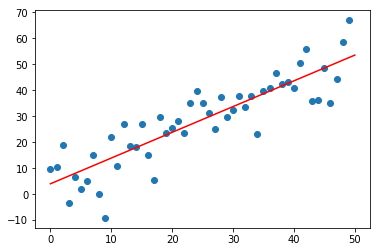

In [7]:
matplotlib.pyplot.clf()
matplotlib.pyplot.scatter(xDataSet,yDataSet)
matplotlib.pyplot.plot([start, end],[y1, y2], color='r')
matplotlib.pyplot.show()
#matplotlib.pyplot.savefig("lse.png")

# Mean Squared Error

In [3]:
def MSE(xDataSet, yDataSet, aCurrent, bCurrent):
    mse = 0.0
    for x,y in zip(xDataSet, yDataSet):
        mse += math.pow((y - (aCurrent + (bCurrent * x))), 2)
    return mse/(len(xDataSet))

In [8]:
leastSquares = MSE(xDataSet, yDataSet, a, b)
leastSquaresGD = MSE(xDataSet, yDataSet, startingA, startingB)

In [9]:
print("Least Square: " + str(leastSquares))
print("Least Square Gradient Descent: " + str(leastSquaresGD))

Least Square: 3149.421413434294
Least Square Gradient Descent: 3675.024352661304
